## REI602M Machine Learning - Project 1
### Due: *Friday* 20.04.2018

**Objectives**: Allstate Claims Severity

**Name**: Þór Tómasarson, **email: ** tht33@hi.is, **collaborators:** Eggert Jón Magnússon

In [1]:
#### Preprocess the data ####
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.read_csv('train.csv', delimiter=',', index_col='id')
X_train, y_train = train.loc[:, train.columns != 'loss'], train['loss']

X_train.describe()    # Is there need to transform the 'loss' column? (mean: 3037.3, std: 2904.1, min: 0.67, max: 121012.25)

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


No need to transform any of the continuous variables. They are all on the interval [0, 1] with reasonable standard deviation.

In [2]:
# One-hot transform
X_train = pd.get_dummies(X_train, drop_first=True)
# drop_first is crucial to avoid correlation in the features
# See this example:
# df = pd.DataFrame(data={'Sex': ['M', 'F', 'F', 'B'], 'Married': ['Yes', 'Yes', 'No', 'No']})
# pd.get_dummies(df, drop_first=True) # VS. drop_first=false

# Do a train - test split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.30)
n_train, m_train = X_train.shape
n_test, m_test = X_test.shape

In [3]:
import time
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32,
                                       random_state=0, n_jobs=-1),
    "K-nn": KNeighborsRegressor(n_jobs=-1),   # n_neighbors=1
    "Linear regression": LinearRegression(n_jobs=-1),
    "Ridge": RidgeCV(),                       # alpha=1.0
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    t_0 = time.time()
    print(f'{name}:')
    estimator.fit(X_train, y_train)
    
    t_1 = time.time()
    print(f'\tTime elapsed for fitting of model {t_1 - t_0:.3f} sec')
    if name == "K-nn":
        sub_idx = np.random.permutation(n_test)[:500]    # TODO: Maybe increase this
        y_test_predict[name] = estimator.predict(X_test.values[sub_idx, :])
        error = mean_absolute_error(y_test.values[sub_idx], y_test_predict[name])
    else:
        y_test_predict[name] = estimator.predict(X_test)
        error = mean_absolute_error(y_test, y_test_predict[name])
    print(f'\tTime elapsed for prediction {time.time() - t_1:.3f} sec')
    print(f'\tError: {error:.3f}')

Extra trees:
	Time elapsed for fitting of model 14.306 sec
	Time elapsed for prediction 0.846 sec
	Error: 1303.215
K-nn:
	Time elapsed for fitting of model 103.587 sec
	Time elapsed for prediction 51.276 sec
	Error: 1438.618
Linear regression:
	Time elapsed for fitting of model 24.312 sec
	Time elapsed for prediction 0.412 sec
	Error: 882042989.017
Ridge:
	Time elapsed for fitting of model 49.416 sec
	Time elapsed for prediction 0.403 sec
	Error: 1290.823


Correlations:
cont1 and 'loss': -0.0102
cont2 and 'loss': 0.1411
cont3 and 'loss': 0.1121
cont4 and 'loss': -0.0360
cont5 and 'loss': -0.0133
cont6 and 'loss': 0.0427
cont7 and 'loss': 0.1201
cont8 and 'loss': 0.0301
cont9 and 'loss': 0.0143
cont10 and 'loss': 0.0224
cont11 and 'loss': 0.0994
cont12 and 'loss': 0.0982
cont13 and 'loss': -0.0020
cont14 and 'loss': 0.0198


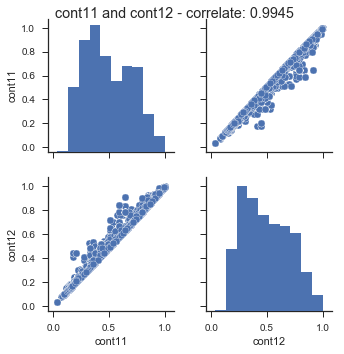

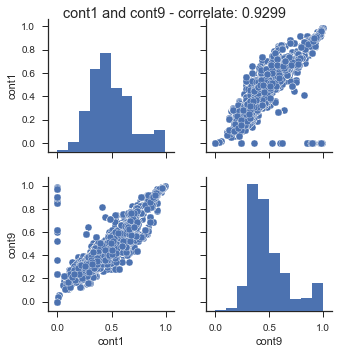

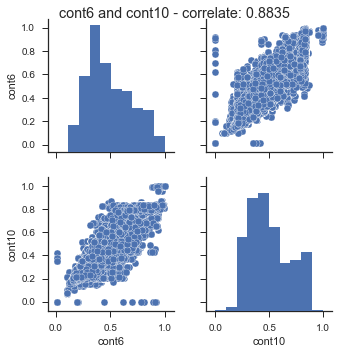

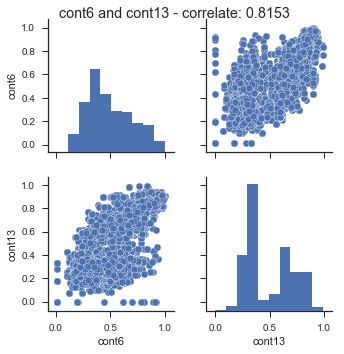

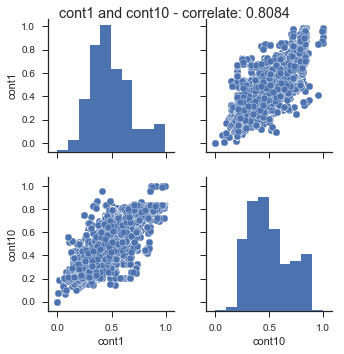

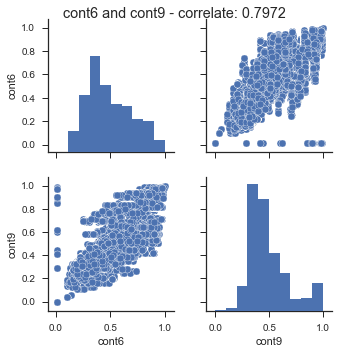

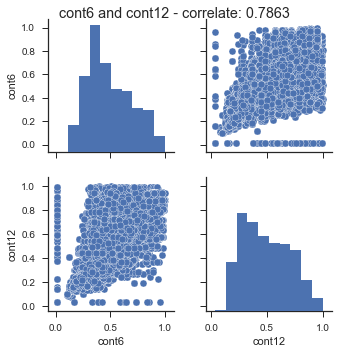

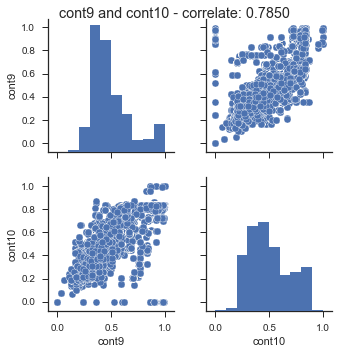

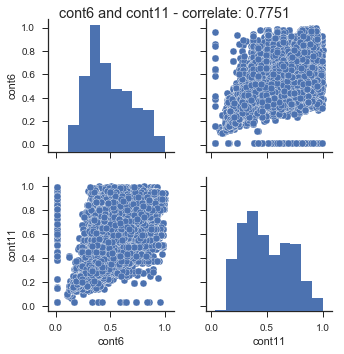

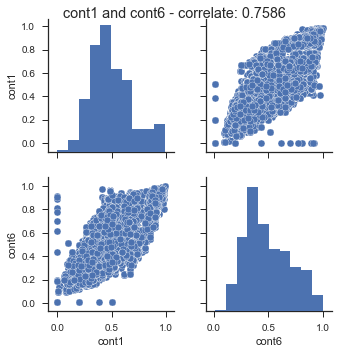

There are 10 correlated features with (absolute) correlation higher than 0.75


In [24]:
# %matplotlib notebook
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import numpy as np
import time

cont_index = [x for x in X_train.columns if x.startswith('cont')]

print('Correlations:')
corr = {}
for idx, col_1 in enumerate(cont_index):
    corr[(col_1, 'loss')] = X_train[col_1].corr(y_train)
    print(f"{col_1} and 'loss': {corr[(col_1, 'loss')]:.4f}")
    
    for col_2 in cont_index[idx+1:]:
        if col_1 != col_2:
            corr[(col_1, col_2)] = X_train[col_1].corr(X_train[col_2])
            
limit = 0.75
correlated = {}
for key, value in corr.items():
    if np.abs(value) > limit:
        # print(f'{key[0]} and {key[1]} - correlate: {value:.4f}')
        correlated[key] = value

import operator
correlated = sorted(correlated.items(), key=operator.itemgetter(1))
correlated.reverse()

for key, value in correlated:
    g = sns.pairplot(X_train[list(key)])
    g.fig.suptitle(f'{key[0]} and {key[1]} - correlate: {value:.4f}')
    plt.show()
print(f'There are {len(correlated)} correlated features with (absolute) correlation higher than {limit}')

In [ ]:
# TODO:
# Count the number of items for each categorical attribute


There is no single continuous attribute with high correlation with the output (loss - attribute).

There are X correlated pairs out of the 14x14 combinations of the continuous attributes. The correlation is high and for [...] this indicates that PCA could be very useful, or one could even consider dropping the following attributes [...]. 

...

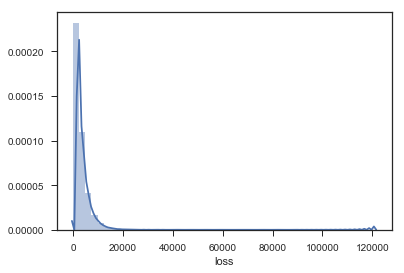

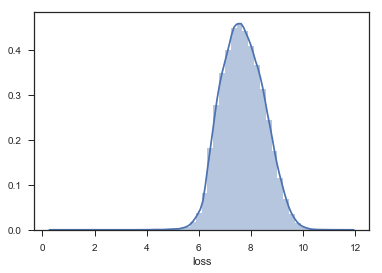

In [25]:
sns.distplot(y_train)
plt.show()

sns.distplot(np.log1p(y_train))
plt.show()

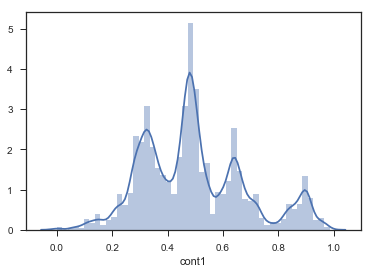

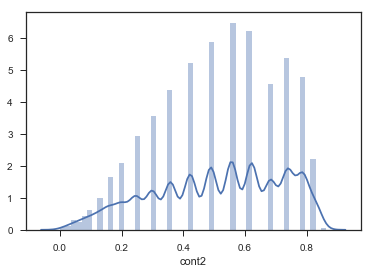

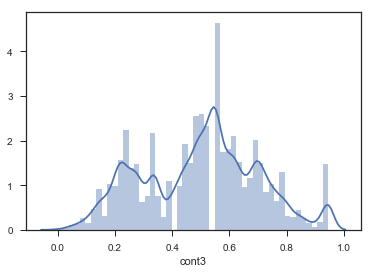

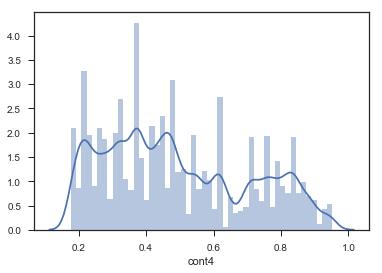

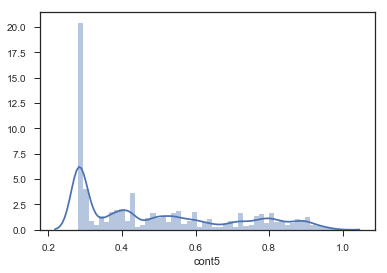

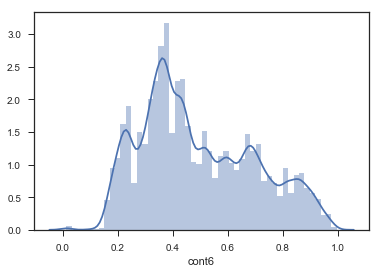

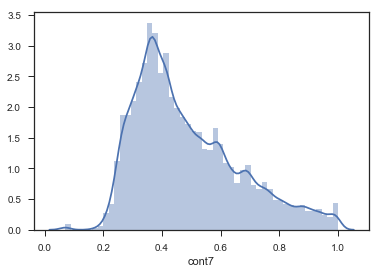

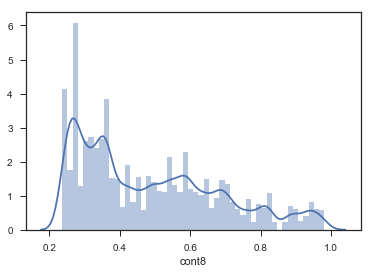

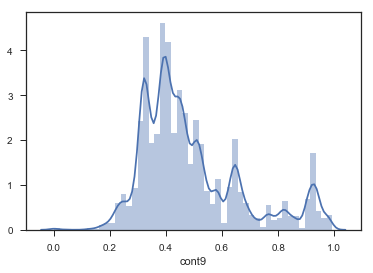

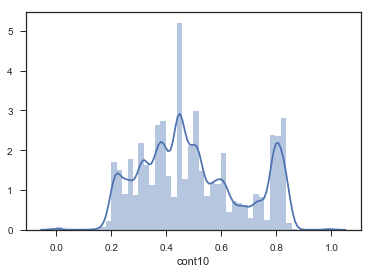

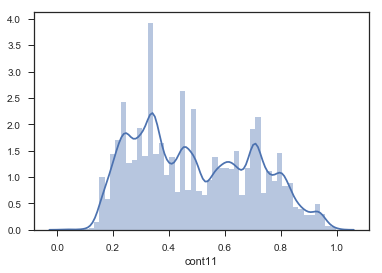

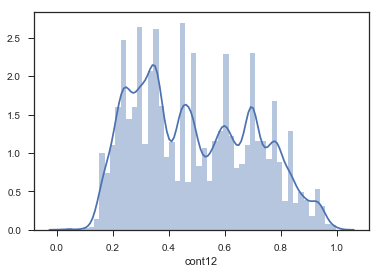

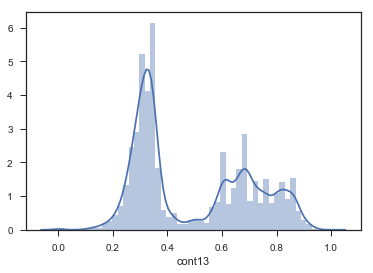

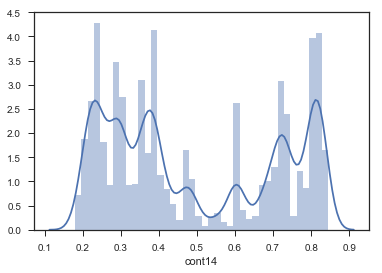

In [26]:
for col in cont_index:
    sns.distplot(X_train[col])
    plt.show()

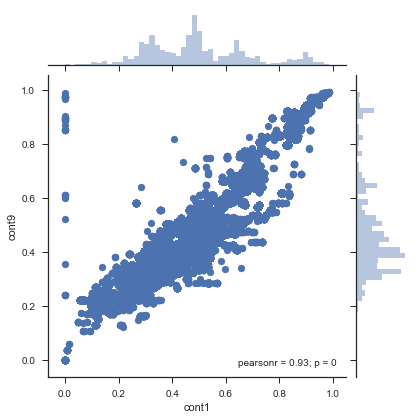

In [27]:
# ('cont1', 'cont9'): 0.92962211090009361
sns.jointplot(x='cont1', y='cont9', data=X_train)
plt.show()